In [7]:
# 라이브러리 
# 행렬연산을 위한 라이브러리
import numpy
# 시그모이드 함수(expit) 사용을 위한 라이브러리
import scipy.special
# 시각화를 위한 라이브러리
import matplotlib.pyplot
%matplotlib inline

In [8]:
# 신경망 클래스
class neuralNetwork:
    
    #신 경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes 
        self.onodes = outputnodes
        
        # 가중치 행렬 wih, who
        #wij는 노드i에서 다음 계층 노드 j로 연결됨을 의미
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로 시그모이드 함수를 사용
        self.activation_function = lambda x : scipy.special.expit(x)
    
    # 신경망 학습시키기
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #은닉계층으로 들어오는 신호계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉계층에서 나가는 신호계산
        hidden_outputs = self.activation_function(hidden_inputs)
        #출력계층으로 들어오는 신호계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #출력계층에서 나가는 신호계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 오차값 구하기(목표 값 - 결과 값)
        output_errors = targets - final_outputs
        # 은닉 오차값 구하기(역전파과정에는 전치로 계산)
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉과 출력노드의 가중치업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # 입력과 은닉노드의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 배열로 변환(1행을 1열형태로 바꿔서 계산에 용이하게)
        inputs = numpy.array(inputs_list, ndmin=2).T
        # 은닉계층으로 들어오는 신호계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호계산
        hidden_outputs = self.activation_function(hidden_inputs)
        # 출력계층으로 들어오는 신호계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 출력계층에서 나가는 신호계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
                

In [9]:
# 노드수 정하기
input_nodes = 784
hidden_nodes = 250
output_nodes = 10
                
# 학습률 정하기
learing_rate = 0.05
            
# 신경망의 인스턴스 설정
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learing_rate)

In [10]:
# mnist training data 불러오기
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [11]:
# 신경망 학습시키기
# 학습데이터 모음 내의 모든 레코드 탐색
# 주기(5일때 좋은 결과값인걸 확인)
epoches = 5
                
for e in range(epoches):
    # 학습데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표로 분리
        all_values = record.split(",")
        # 입력값 재조정
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.999) + 0.001
        # 결과값 생성
        targets = numpy.zeros(output_nodes) +0.01
        # all_values[0]은 레코드에 대한 결과값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [13]:
# 파일 및 디렉토리의 리스트를 반환을 위한 라이브러리
import glob
# 이미지로드를 위한 라이브러리
import imageio
# 행렬 연산을 위한 라이브러리
import numpy
# 손글씨 테스트 데이터 셋 만들기
our_own_dataset = []

# 테스트로 쓸 png 파일들 불러오기 
for image_file_name in glob.glob("own_number_images/image_?.png"):
     # 파일 제목의 숫자 부분을 레이블로 설정 
    label = int(image_file_name[-5])
    
    # png 파일 로드하기
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # 255.0으로부터 784값의 (28,28)행렬값을 빼줌
    img_data  = 255.0 - img_array.reshape(28,28)
    
    # 데이터값의 범위를 0.01에서 1.0으로 조절
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
     # 레이블과 이미지데이터를 테스트 셋에 추가 
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)

loading ...  own_number_images\image_1.png
0.28387672
0.77621734
loading ...  own_number_images\image_2.png
0.3011765
0.7287012
loading ...  own_number_images\image_3.png
0.30284587
0.80062956
loading ...  own_number_images\image_6.png
0.33523247
0.8390532
loading ...  own_number_images\image_8.png
0.30001566
0.7666162
loading ...  own_number_images\image_9.png
0.31970304
0.73123246


[[0.01932661]
 [0.00150696]
 [0.14377455]
 [0.48457794]
 [0.00085465]
 [0.02428902]
 [0.04338387]
 [0.01145348]
 [0.72620794]
 [0.27283962]]
network says 8
no match!


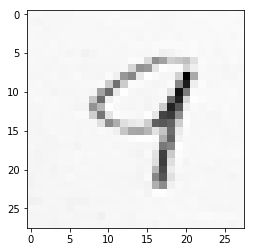

In [20]:
import matplotlib.pyplot

# 테스트 셋에서의 레코드
item = 5

# 숫자를 (28,28)사이즈로 보기
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# 손글씨 테스트 데이터 셋에 첫번째 값을 correct label값으로 
correct_label = our_own_dataset[item][0]
# 남은 부분을 입력값으로 
inputs = our_own_dataset[item][1:]

# 신경망에 질의하기
outputs = n.query(inputs)
print (outputs)

# 행렬연산후 가장큰값을 label에 할당 
label = numpy.argmax(outputs)
print("network says", label)
# 결과가 일치하면 "match" 틀리면 "no match" 
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")